Import the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

Import the dataset

In [ ]:
from keras.datasets import mnist

Load the dataset

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

Normalizing and reshaping

In [ ]:
x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))

x_test = x_test.astype('float32') / 255.
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

Adding noise

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Visualizing noisy data

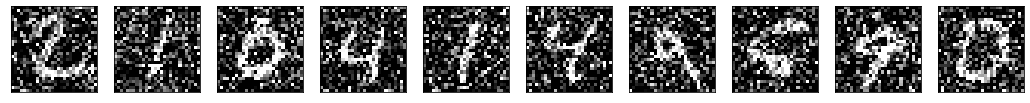

In [ ]:
plt.figure(figsize=(20, 2))
for i in range(1, 11):
    ax = plt.subplot(1, 11, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 8)          0

In [ ]:
model.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True, 
          validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 [==============================] - 161s 341ms/step - loss: 0.0458 - accuracy: 0.8000 - val_loss: 0.0331 - val_accuracy: 0.8015
Epoch 2/10
469/469 [==============================] - 150s 320ms/step - loss: 0.0305 - accuracy: 0.8046 - val_loss: 0.0283 - val_accuracy: 0.8067
Epoch 3/10
469/469 [==============================] - 150s 320ms/step - loss: 0.0272 - accuracy: 0.8063 - val_loss: 0.0257 - val_accuracy: 0.8050
Epoch 4/10
469/469 [==============================] - 150s 319ms/step - loss: 0.0253 - accuracy: 0.8072 - val_loss: 0.0242 - val_accuracy: 0.8058
Epoch 5/10
469/469 [==============================] - 151s 322ms/step - loss: 0.0241 - accuracy: 0.8078 - val_loss: 0.0236 - val_accuracy: 0.8063
Epoch 6/10
469/469 [==============================] - 154s 329ms/step - loss: 0.0232 - accuracy: 0.8082 - val_loss: 0.0224 - val_accuracy: 0.8072
Epoch 7/10
469/469 [==============================] - 149s 318ms/step - loss: 0.0226 - accuracy: 0.8085 - val_loss: 0.0220 -

In [ ]:
model.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.0208 - accuracy: 0.8077


[0.020829323679208755, 0.8077137470245361]

In [ ]:
no_noise_img = model.predict(x_test_noisy)

313/313 [==============================] - 6s 20ms/step


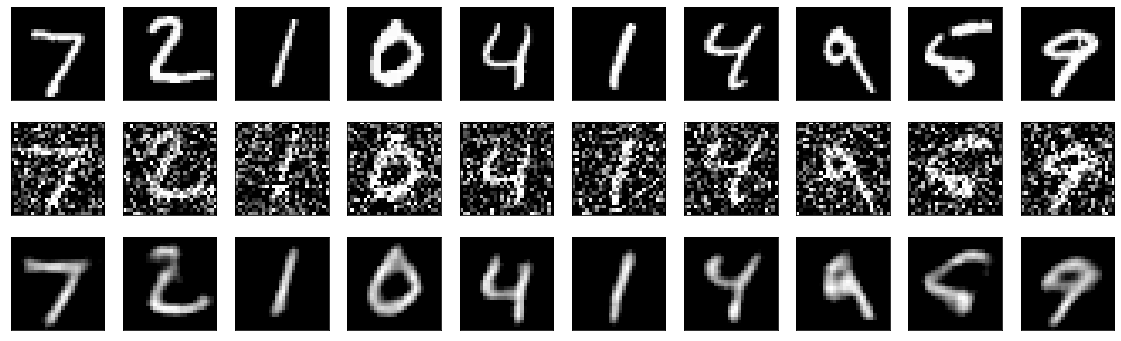

In [ ]:
plt.figure(figsize=(60, 6))
for i in range(10):
    # display original
    ax = plt.subplot(3, 30, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)  

    #display noisy images
    ax = plt.subplot(3, 30, 30 + i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)  

    # display denoised images
    ax = plt.subplot(3, 30, 60 + i + 1)
    plt.imshow(no_noise_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)  

plt.show()